**Kelompok 1+n**\
Nabila Janatri Iswibowo - 1305210082\
Latifa Firdausi - 1305210073

In [ ]:
from ast import literal_eval
import networkx as nx
from datetime import datetime
import numpy as np
import community
from collections import defaultdict
from wordcloud import WordCloud
import pandas as pd
import matplotlib.pyplot as plt

**PREPROCESSING DATA**

In [ ]:
#Preprocessing Data
members = pd.read_csv('house_members_116.csv', index_col = 0)

members.committee_assignments = members.committee_assignments.apply(literal_eval)
members.head()

,name,state,url,chamber,current_party,committee_assignments
name_id,,,,,,
A000374,ralph-abraham,Louisiana,https://www.congress.gov/member/ralph-abraham/...,House,Republican,"[Agriculture, Armed Services]"
A000370,alma-adams,North Carolina,https://www.congress.gov/member/alma-adams/A00...,House,Democratic,"[Agriculture, Education and Labor, Financial S..."
A000055,robert-aderholt,Alabama,https://www.congress.gov/member/robert-aderhol...,House,Republican,[Appropriations]
A000371,pete-aguilar,California,https://www.congress.gov/member/pete-aguilar/A...,House,Democratic,"[Appropriations, House Administration]"
A000372,rick-allen,Georgia,https://www.congress.gov/member/rick-allen/A00...,House,Republican,"[Agriculture, Education and Labor]"


In [ ]:
#Preprocessing Data
bills = pd.read_csv('house_legislation_116.csv', index_col = 0, parse_dates=["date_introduced"])

bills.cosponsors=bills.cosponsors.apply(literal_eval)
bills.subjects = bills.subjects.apply(literal_eval)
bills.committees = bills.committees.apply(literal_eval)
bills.related_bills = bills.related_bills.apply(literal_eval)

bills.head()

,title,sponsor,cosponsors,related_bills,policy_area,subjects,committees,bill_progress,summary,date_introduced,number,bill_type
bill_id,,,,,,,,,,,,
H.R.1,"To expand Americans' access to the ballot box,...",S001168,"[P000197, A000370, A000376, B001300, B001281, ...","[H.R.44, H.R.93, H.R.137, H.R.138, H.R.196, H....",Government Operations and Politics,"[Administrative law and regulatory procedures,...","[House Administration, House Intelligence (Per...",Passed House,"This bill addresses voter access, election int...",2019-01-03,1,H.R.
H.R.3,"To establish a fair price negotiation program,...",P000034,"[N000015, S000185, L000557, K000382, D000197, ...","[H.R.4619, H.R.4649, H8607, H.R.4663]",Health,[],"[House Energy and Commerce, House Ways and Mea...",Introduced,This bill establishes several programs and req...,2019-09-19,3,H.R.
H.R.4,To amend the Voting Rights Act of 1965 to revi...,S001185,"[L000287, P000197, H000874, C000537, L000570, ...","[H.R.1799, S.561]",Government Operations and Politics,"[Civil actions and liability, Elections, votin...",[House Judiciary],Introduced,NaN,2019-02-26,4,H.R.
H.R.5,To prohibit discrimination on the basis of sex...,C001084,"[F000466, C001119, D000629, H001087, M001185, ...","[H.Res.377, S.788]","Civil Rights and Liberties, Minority Issues","[Civil actions and liability, Consumer credit,...","[House Judiciary, House Education and Labor, H...",Passed House,This bill prohibits discrimination based on se...,2019-03-13,5,H.R.
H.R.6,To authorize the cancellation of removal and a...,R000486,"[V000081, C001067, A000371, B001300, C001112, ...","[H.R.2820, H.R.2821, H.Res.415, S.874]",Immigration,"[Administrative law and regulatory procedures,...","[House Judiciary, House Education and Labor]",Passed House,This bill cancels and prohibits removal procee...,2019-03-12,6,H.R.


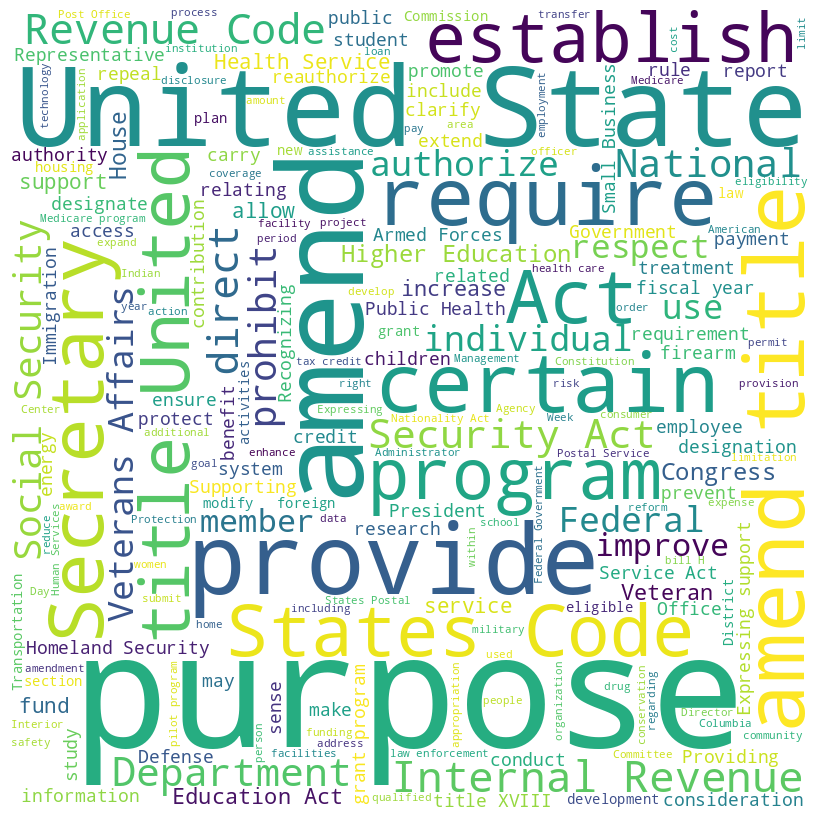

In [ ]:
df = pd.read_csv('house_legislation_116.csv')

text = ' '.join(df['title'])

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

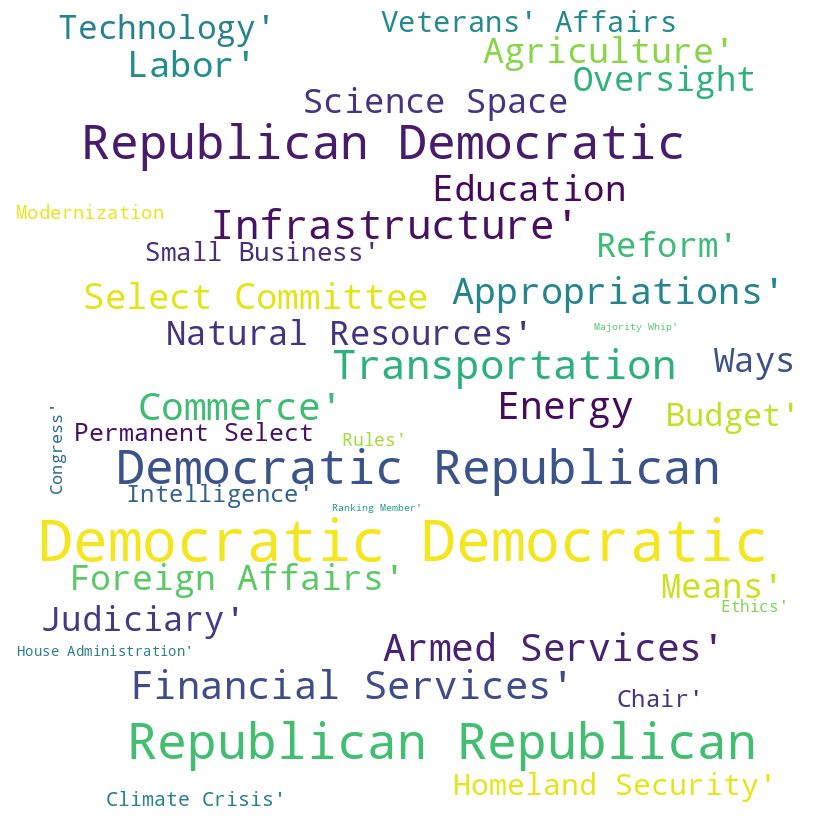

In [ ]:
data = pd.read_csv('house_members_116.csv')

text = ' '.join(data['current_party']) + ' ' + ' '.join(data['committee_assignments'].fillna(''))

wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = None,
                min_font_size = 10).generate(text)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)

plt.show()

**EXPLORATORY DATA ANALYSIS**

**Rancangan Undang Undang yang Diajukan dan Disahkan Menurut Partai dan Kebijakan**

Distribusi berikut merupakan distribusi rancangan undang undang berdasarkan dari partai anggota yang sudah mengusulkan dan kebijakan dari rancangan undang undang yang ada. Hasil plot menggambarkan hasil normalisasi yang menunjukkan persentase rancangan undang undang yang telah diusulkan. Terdapat 24 bidang rancangan undang undang yang diajukan oleh tiap belah pihak partai.

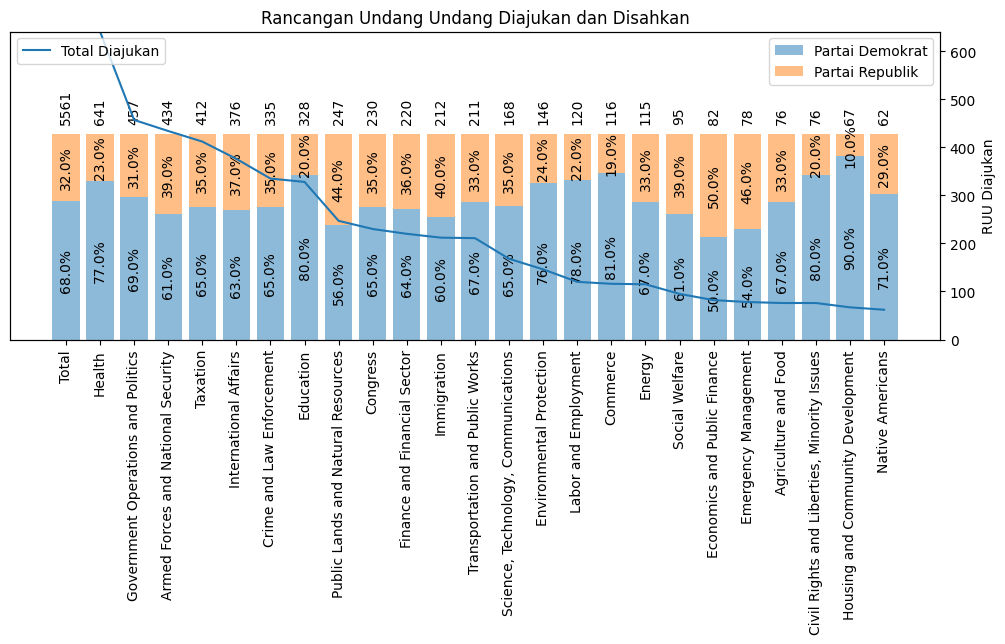

In [ ]:
areas = bills.policy_area.unique()

dic = {area: [0,0,0,0] for area in areas}

for index, row in bills.iterrows():
    if members.loc[row.sponsor].current_party == 'Democratic':
        dic[row.policy_area][0] += 1
        if row.bill_progress == ('Passed House' or 'Passed Senate' or 'Became Law' or 'To President' or 'Agreed to in House' or 'Agreed to in Senate'):
                dic[row.policy_area][1]+=1
    elif members.loc[row.sponsor].current_party == 'Republican':
        dic[row.policy_area][2] += 1
        if row.bill_progress == ('Passed House' or 'Passed Senate' or 'Became Law' or 'To President' or 'Agreed to in House' or 'Agreed to in Senate'):
                dic[row.policy_area][3]+=1

df = pd.DataFrame(dic.values(), index = dic.keys(), columns = ['Democratic', 'Democrats_Passed','Republican', 'Republicans_Passed']).sort_values('Democratic', ascending = False)

df.drop(np.nan, inplace = True)

df.loc['Total'] = [sum(df[x]) for x in df.columns]

df['Total'] = df.Democratic +df.Republican

df['Total_Passed'] = df.Democrats_Passed+df.Republicans_Passed

df['D%_passed']=df.Democrats_Passed/df.Total_Passed
df['R%_passed']=df.Republicans_Passed/df.Total_Passed
df['D%_introduced'] = df['Democratic']/df['Total']
df['R%_introduced'] = df['Republican']/df['Total']
df['%_passed'] = 100*(df['Total_Passed']/df['Total'])

df.fillna(0, inplace=True)

df.sort_values(by=['Total'], ascending = False, inplace= True)

n=25
x= df.head(n).index
y1= df.head(n)['D%_introduced']
y2= df.head(n)['R%_introduced']
total = df.head(n)['Total']

fig, (ax1) = plt.subplots(nrows =1, ncols =1, figsize=(12, 4), squeeze = True)


ax1.bar(x, y1, label='Partai Demokrat', alpha = .5)
ax1.bar(x, y2 ,bottom= y1,label= 'Partai Republik', alpha = .5)

for xpos, ypos, yval in zip(x, y1/2, y1):
    if yval>0:
        ax1.text(xpos, ypos, str(round(yval*100,0))+ "%", ha="center", va="center", rotation=90)
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    if yval>0:
        ax1.text(xpos, ypos, str(round(yval*100,0))+ "%", ha="center", va="center", rotation= 90)
for xpos, ypos, total in zip(x, y1+y2, total):
    ax1.text(xpos, ypos +.05, total, ha="center", va="bottom", rotation= 90)

for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

ax1.set_title('Rancangan Undang Undang Diajukan dan Disahkan')
ax1.legend(loc = 'upper right')

ax1.set_ylim(0,1.5)
ax1.yaxis.set_visible(False)

ax3 = ax1.twinx()
ax3.plot(x, df.head(n).Total, label = 'Total Diajukan')
ax3.set_ylim(0,641)
ax3.legend(loc = 'upper left')
ax3.yaxis.set_visible(True)
ax3.set_ylabel('RUU Diajukan')

plt.show()


**RUU yang Disahkan Oleh Partai**

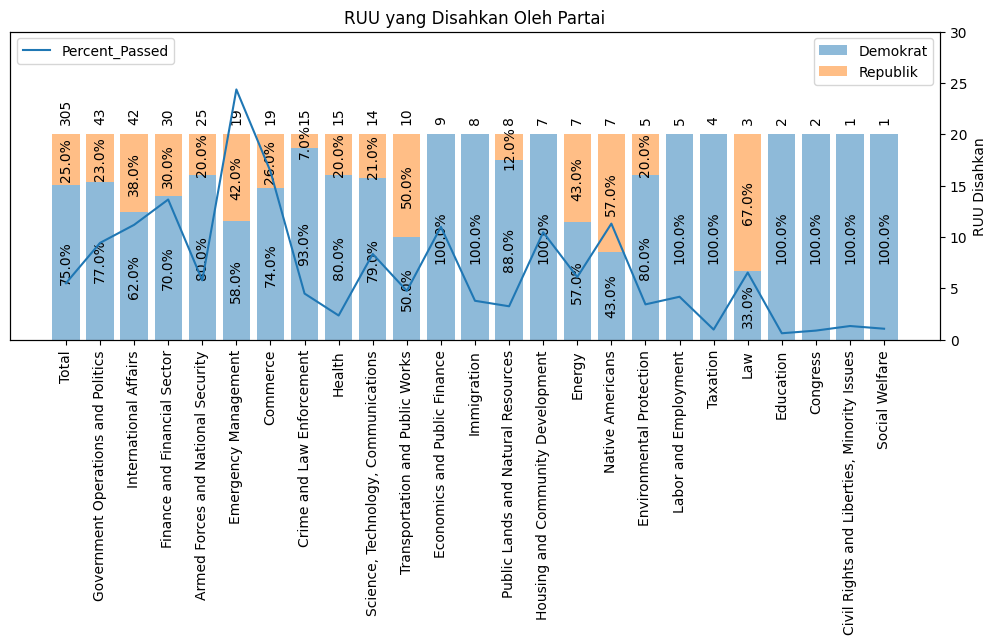

In [ ]:
fig, (ax2) = plt.subplots(nrows =1, ncols =1, figsize=(12, 4), squeeze = True)

df.sort_values(by=['Total_Passed'], ascending = False, inplace= True)

x= df.head(n).index
y1= df.head(n)['D%_passed']
y2= df.head(n)['R%_passed']
y3= df.head(n)['Democratic']+ df.head(n)['Republican']
total = df.head(n)['Total_Passed']

ax2.bar(x, y1, label='Demokrat', alpha=.5)
ax2.bar(x, y2 ,bottom= y1,label= 'Republik', alpha=.5)

ax4 = ax2.twinx()
ax4.plot(x, df.head(n)['%_passed'], label = 'Percent_Passed')
ax4.set_ylim(0,30)
ax4.legend(loc = 'upper left')
ax4.yaxis.set_visible(True)
ax4.set_ylabel("RUU Disahkan")

for xpos, ypos, yval in zip(x, y1/2, y1):
    if yval>0:
        ax2.text(xpos, ypos, str(round(yval*100,0))+ "%", ha="center", va="center", rotation=90)
for xpos, ypos, yval in zip(x, y1+y2/2, y2):
    if yval>0:
        ax2.text(xpos, ypos, str(round(yval*100,0))+ "%", ha="center", va="center", rotation= 90)
for xpos, ypos, total in zip(x, y1+y2, total):
    ax2.text(xpos, ypos +.05, total, ha="center", va="bottom", rotation= 90)

for tick in ax2.get_xticklabels():
    tick.set_rotation(90)
ax2.set_title('RUU yang Disahkan Oleh Partai')
ax2.legend(loc = 'upper right')

ax2.set_ylim(0,1.5)
ax2.yaxis.set_visible(False)

plt.show()


**Perwakilan dari Tiap Partai Berdasarkan Jumlah RUU yang Disahkan**

Setelah analisis RUU yang telah disahkan berdasarkan pengajuan dari tiap partai, berikut adalah jumlah total keseluruhan yang akan diurutkan berdasarkan jumlah RUU yang disahkan. Output menunjukkan yang paling efektif dari jumlah RUU yang disahkan diantaranya Eliot Engel, Elijah Cummings, Sheila Jackson Lee.Kemudian Partai Demokrat sebagai mayoritas yang memiliki jumlah RUU yang disahkan. Sementara untuk Partai Republik yang paling efektif adalah Michael Mccaul.

In [ ]:
dic = {k:[0,0] for k in members.index}

for index, row in bills.iterrows():
    dic[row.sponsor][1]+=1
    if row.bill_progress == ('Passed House' or 'Passed Senate' or 'Became Law' or 'To President' or 'Agreed to in House' or 'Agreed to in Senate'):
        dic[row.sponsor][0]+=1

num_passed = pd.DataFrame.from_dict(dic, orient = 'index',columns = ['num_passed', 'total_introduced'])

num_passed['percent_passed'] =( num_passed['num_passed']/num_passed['total_introduced'])*100

num_passed.sort_values(by = ['num_passed','percent_passed'], ascending = False, inplace = True)

num_passed.merge(members[['name', 'current_party', 'committee_assignments']], how = 'inner', left_index= True, right_index =True).head(10)

,num_passed,total_introduced,percent_passed,name,current_party,committee_assignments
E000179,9,53,16.981132,eliot-engel,Democratic,"[Foreign Affairs, Chair, Energy and Commerce]"
C000984,5,32,15.625000,elijah-cummings,Democratic,"[Oversight and Reform, Chair, Transportation a..."
J000032,5,37,13.513514,sheila-jackson-lee,Democratic,"[Budget, Homeland Security, Judiciary]"
T000193,4,16,25.000000,bennie-thompson,Democratic,"[Homeland Security, Chair]"
J000126,4,19,21.052632,eddie-johnson,Democratic,"[Science, Space, and Technology, Chair, Transp..."
R000602,4,19,21.052632,kathleen-rice,Democratic,"[Homeland Security, Veterans' Affairs]"
M001157,4,23,17.391304,michael-mccaul,Republican,"[Foreign Affairs, Homeland Security]"
L000480,4,24,16.666667,nita-lowey,Democratic,"[Appropriations, Chair]"
L000588,3,9,33.333333,conor-lamb,Democratic,"[Science, Space, and Technology, Veterans' Aff..."
W000825,3,9,33.333333,jennifer-wexton,Democratic,"[Financial Services, Science, Space, and Techn..."


**Create Sponsor/Cosponsor Networks**

In [ ]:
policy_area = 'Crime and Law Enforcement'

MD = nx.MultiDiGraph()
MD.add_nodes_from(members.index)
for index, row in bills.iterrows():
    sponsor = [row.sponsor for i in range(len(row.cosponsors))]
    zipped = zip(row.cosponsors, sponsor)
    zipped = list(zipped)

    MD.add_edges_from(zipped, bill = index, policy_area = row.policy_area, bill_progress = row.bill_progress)

to_drop =['G000582', 'R000600', 'N000147', 'P000610', 'S001177', 'S001204', 'P000197', 'J000255']
MD.remove_nodes_from(to_drop)

nx.set_node_attributes(MD,  members.current_party.to_dict(), 'party')

G = nx.Graph()

for n, nbrs in MD.adjacency():
    for nbr, edict in nbrs.items():
        if (G.has_edge(n,nbr)) :
            G[n][nbr]['weight'] +=len(edict)
        else:
             G.add_edge(n, nbr, weight=len(edict))

MDs = nx.MultiDiGraph()

for u,v,d in MD.edges(data = True):
    if d['policy_area'] ==  policy_area:
        MDs.add_edge(u,v,bill = d['bill'])

Gs = nx.Graph()

for n, nbrs in MDs.adjacency():
    for nbr, edict in nbrs.items():
        if (Gs.has_edge(n,nbr)) :
            Gs[n][nbr]['weight'] +=len(edict)
        else:
             Gs.add_edge(n, nbr, weight=len(edict))


**Detect Communities and Plot Total**

In [ ]:
from community import community_louvain
partition = community_louvain.best_partition(G)

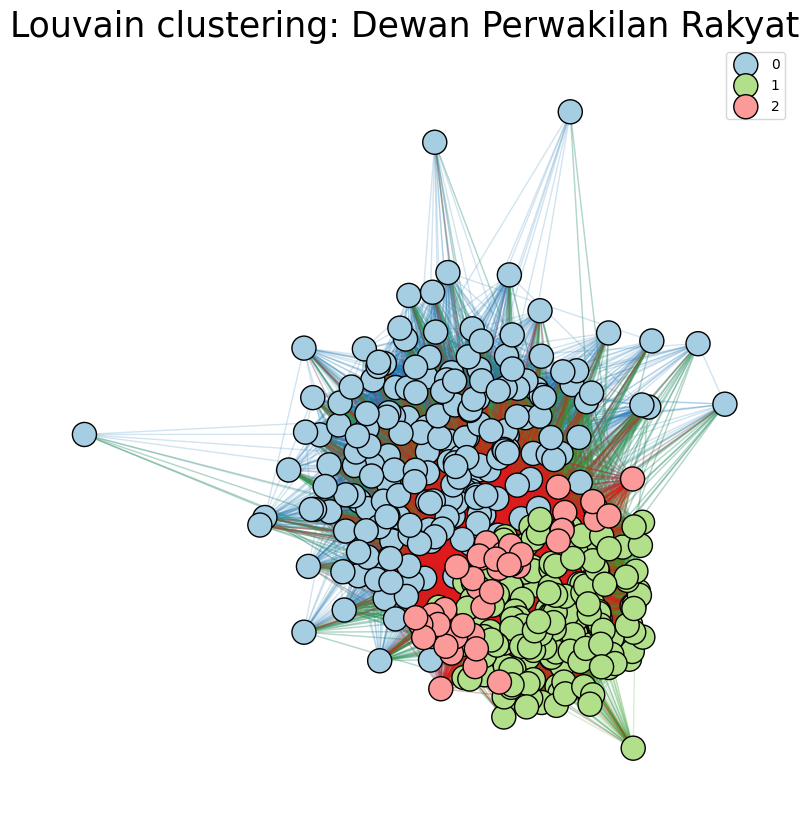

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def get_paired_color_palette(size):
    palette = []
    for i in range(size*2):
        palette.append(plt.cm.Paired(i))
    return palette

communities = []
louvain = community_louvain.best_partition(G, weight='weight', random_state=42)
for i in set(louvain.values()):
    nodelist = [n for n in G.nodes if (louvain[n]==i)]
    communities.append(nodelist)

clusters_count = len(set(louvain.values()))
plt.figure(figsize=(10, 10))
light_colors = get_paired_color_palette(clusters_count)[0::2]
dark_colors = get_paired_color_palette(clusters_count)[1::2]
g = nx.spring_layout(G, weight='weight', seed=42, threshold=.0000000001)

for i in set(louvain.values()):
    nodelist = [n for n in G.nodes if (louvain[n]==i)]
    edgelist = [e for e in G.edges if ((louvain[e[0]]==i) or (louvain[e[1]]==i))]
    node_color = [light_colors[i] for _ in range(len(nodelist))]
    edge_color = [dark_colors[i] for _ in range(len(edgelist))]
    nx.draw_networkx_nodes(G, g, nodelist=nodelist, node_color=node_color, edgecolors='k', label=i)
    nx.draw_networkx_edges(G, g, edgelist=edgelist, alpha=.2, edge_color=edge_color)

plt.title('Louvain clustering: Dewan Perwakilan Rakyat', fontdict={'fontsize': 25})
plt.legend()
plt.axis('off')
plt.show()


**Hasil Analisis**

In [ ]:
community_members = defaultdict()
community_bills = defaultdict()

for i in range(3):
    dic ={}
    index = []
    community_of_interest = i

    subgraph = MD.subgraph(communities[community_of_interest])
    community_members[i] = pd.DataFrame.from_dict(nx.algorithms.centrality.in_degree_centrality(subgraph), orient = 'index', columns = ['centrality']).merge(members[['name','current_party', 'committee_assignments']], how = 'left', left_index = True, right_index = True).sort_values(by= 'centrality',ascending = False)

    community_bills[i] = bills.loc[[row.sponsor in communities[i] for index, row in bills.iterrows()]]

    for bill, row in community_bills[i].iterrows():
        index.append(bill)
        dic[bill] = 0
        for cosponsor in row.cosponsors:
            if cosponsor in community_members[i].index:
                dic[bill] += 1

    tally = pd.DataFrame.from_dict(dic, orient = 'index',columns = ['in_community_cosponsors'])
    community_bills[i] = tally.merge(community_bills[i][['title', 'bill_progress']],how = 'outer', left_index =True, right_index= True)

l = []
index = []
for i in range(3):
    community_i = members.loc[communities[i]]
    democrats = len(community_i.loc[community_i.current_party == 'Democratic'])
    republicans = len(community_i.loc[community_i.current_party == 'Republican'])
    independents = len(community_i.loc[community_i.current_party == 'Independent'])
    total_members = len(community_i)
    total_bills = len(community_bills[i])
    bills_passed = len(community_bills[i].loc[community_bills[i].bill_progress ==  ('Passed House' or 'Passed Senate' or 'Became Law' or 'To President' or 'Agreed to in House' or 'Agreed to in Senate')])
    l.append([democrats, republicans, independents, total_members, total_bills, bills_passed])
    index.append('community_' +str(i))


df = pd.DataFrame(l, columns = ['democrat', 'republicans', 'independents', 'total_members', 'total_bills', 'bills_passed'],index = index)
df['percent_passed'] = (df['bills_passed']/df['total_bills'])*100
df.head()

,democrat,republicans,independents,total_members,total_bills,bills_passed,percent_passed
community_0,9,194,1,204,1845,74,4.01084
community_1,190,1,0,191,3187,178,5.58519
community_2,35,5,0,40,632,51,8.06962


**Most Central Member Pada Komunitas**

In [ ]:
df = pd.concat([community_members[0], community_members[1], community_members[2]], keys =
         [0,1,2])

df.index.rename(['community','member'], inplace = True)

df= df.merge(num_passed, how = 'inner', left_on = 'member', right_index=True).sort_values(['community','centrality'], ascending = False)

pd.concat([df.loc[2].head(10), df.loc[1].head(10), df.loc[0].head(10)], keys =
         [2,1,0])

centrality               name current_party  \
  member                                                 
2 E000179    4.923077        eliot-engel    Democratic   
  D000610    4.282051    theodore-deutch    Democratic   
  K000210    2.435897         peter-king    Republican   
  C001078    2.410256    gerald-connolly    Democratic   
  S001190    2.410256  bradley-schneider    Democratic   
  R000602    2.153846      kathleen-rice    Democratic   
  P000096    1.794872   william-pascrell    Democratic   
  L000562    1.794872      stephen-lynch    Democratic   
  K000381    1.692308       derek-kilmer    Democratic   
  M001180    1.666667     david-mckinley    Republican   
1 C001084    6.289474    david-cicilline    Democratic   
  M000087    5.605263    carolyn-maloney    Democratic   
  C001080    5.042105           judy-chu    Democratic   
  S001175    4.857895      jackie-speier    Democratic   
  L000551    4.831579        barbara-lee    Democratic   
  S000185    4.742105       robert-scott    Democratic   
  D000216    4.678947       rosa-delauro    Democratic   
  T000460    4.168421      mike-thompson    Democratic   
  D000191    3.721053      peter-defazio    Democratic   
  B000574    3.605263    earl-blumenauer    Democratic   
0 K000188    3.054187           ron-kind    Democratic   
  B001302    3.044335         andy-biggs    Republican   
  S000522    2.344828  christopher-smith    Republican   
  S001185    1.689655       terri-sewell    Democratic   
  H001053    1.605911     vicky-hartzler    Republican   
  S001196    1.492611     elise-stefanik    Republican   
  W000795    1.428571         joe-wilson    Republican   
  S001176    1.413793      steve-scalise    Republican   
  S001195    1.334975        jason-smith    Republican   
  C001093    1.310345       doug-collins    Republican   

                                       committee_assignments  num_passed  \
  member                                                                   
2 E000179      [Foreign Affairs, Chair, Energy and Commerce]           9   
  D000610        [Ethics, Chair, Foreign Affairs, Judiciary]           3   
  K000210            [Financial Services, Homeland Security]           1   
  C001078            [Foreign Affairs, Oversight and Reform]           3   
  S001190                   [Small Business, Ways and Means]           0   
  R000602             [Homeland Security, Veterans' Affairs]           4   
  P000096                                   [Ways and Means]           1   
  L000562  [Financial Services, Oversight and Reform, Tra...           2   
  K000381  [Select Committee on the Modernization of Cong...           1   
  M001180                              [Energy and Commerce]           0   
1 C001084                       [Foreign Affairs, Judiciary]           2   
  M000087         [Financial Services, Oversight and Reform]           2   
  C001080                   [Small Business, Ways and Means]           2   
  S001175  [Armed Services, Oversight and Reform, Permane...           0   
  L000551                           [Appropriations, Budget]           0   
  S000185               [Education and Labor, Chair, Budget]           1   
  D000216                           [Appropriations, Budget]           3   
  T000460                                   [Ways and Means]           3   
  D000191         [Transportation and Infrastructure, Chair]           3   
  B000574                                   [Ways and Means]           1   
0 K000188                                   [Ways and Means]           0   
  B001302        [Judiciary, Science, Space, and Technology]           0   
  S000522                                  [Foreign Affairs]           2   
  S001185  [Ways and Means, Permanent Select Committee on...           0   
  H001053                      [Agriculture, Armed Services]           0   
  S001196  [Armed Services, Education and Labor, Permanen...           0   
  W000795                 

**Most Effective Member Pada Komunitas**

In [ ]:
df = pd.concat([community_members[0], community_members[1], community_members[2]], keys =
         [0,1,2])
df.index.rename(['community','member'], inplace = True)
df= df.merge(num_passed, how = 'inner', left_on = 'member', right_index=True).sort_values(['community','num_passed','percent_passed', 'total_introduced'], ascending = False)
pd.concat([df.loc[2].head(5), df.loc[1].head(5), df.loc[0].head(5)], keys =
         [2,1,0])

centrality                name current_party  \
  member                                                  
2 D000610    1.871795     theodore-deutch    Democratic   
  C001111    0.538462       charlie-crist    Democratic   
  R000602    0.051282       kathleen-rice    Democratic   
  F000466    0.076923   brian-fitzpatrick    Republican   
  P000096    0.307692    william-pascrell    Democratic   
1 J000032    0.431579  sheila-jackson-lee    Democratic   
  B001270    0.763158          karen-bass    Democratic   
  T000193    0.247368     bennie-thompson    Democratic   
  C000537    0.052632       james-clyburn    Democratic   
  D000627    0.000000         val-demings    Democratic   
0 C000266    0.000000        steve-chabot    Republican   
  K000392    0.000000       david-kustoff    Republican   
  W000812    1.179104          ann-wagner    Republican   
  W000798    0.378109         tim-walberg    Republican   
  P000605    0.248756         scott-perry    Republican   

                                       committee_assignments           state  \
  member                                                                       
2 D000610        [Ethics, Chair, Foreign Affairs, Judiciary]         Florida   
  C001111   [Appropriations, Science, Space, and Technology]         Florida   
  R000602             [Homeland Security, Veterans' Affairs]        New York   
  F000466  [Foreign Affairs, Transportation and Infrastru...    Pennsylvania   
  P000096                                   [Ways and Means]      New Jersey   
1 J000032             [Budget, Homeland Security, Judiciary]           Texas   
  B001270                       [Foreign Affairs, Judiciary]      California   
  T000193                         [Homeland Security, Chair]     Mississippi   
  C000537                                    [Majority Whip]  South Carolina   
  D000627  [Homeland Security, Judiciary, Permanent Selec...         Florida   
0 C000266       [Foreign Affairs, Judiciary, Small Business]            Ohio   
  K000392                               [Financial Services]       Tennessee   
  W000812              [Financial Services, Foreign Affairs]        Missouri   
  W000798         [Education and Labor, Energy and Commerce]        Michigan   
  P000605  [Foreign Affairs, Transportation and Infrastru...    Pennsylvania   

           num_passed  total_introduced  percent_passed  
  member                                                 
2 D000610           2                11       18.181818  
  C001111           1                 1      100.000000  
  R000602           1                 1      100.000000  
  F000466           0                 4        0.000000  
  P000096           0                 3        0.000000  
1 J000032           3                10       30.000000  
  B001270           2                 3       66.666667  
  T000193           1                 1      100.000000  
  C000537           1                 1      100.000000  
  D000627           1                 1      100.000000  
0 C000266           1                 1      100.000000  
  K000392           0                 5        0.000000  
  W000812           0                 3        0.000000  
  W000798           0                 3        0.000000  
  P000605           0                 3        0.000000

**Detect Communities by Crime and Law Enforcement**

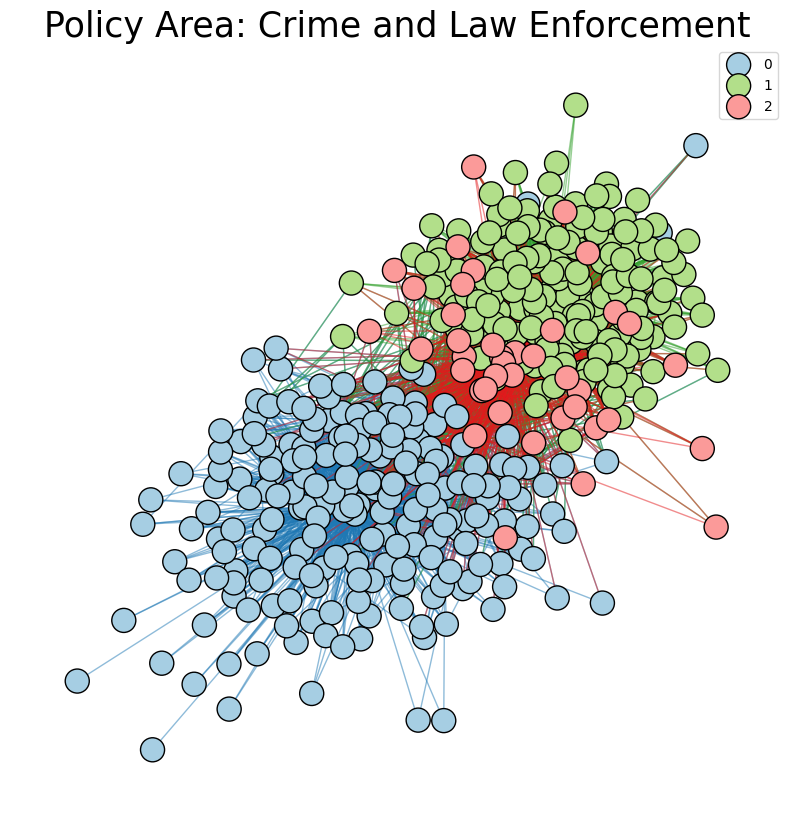

In [ ]:
def get_paired_color_palette(size):
    palette = []
    for i in range(size*2):
        palette.append(plt.cm.Paired(i))
    return palette

communities =[]
louvain = community_louvain.best_partition(G, weight='weight', random_state=42)
for i in set(louvain.values()):
    nodelist = [n for n in Gs.nodes if (louvain[n]==i)]
    communities.append(nodelist)

clusters_count = len(set(louvain.values()))
plt.figure(figsize=(10, 10))
light_colors = get_paired_color_palette(clusters_count)[0::2]
dark_colors = get_paired_color_palette(clusters_count)[1::2]
g = nx.drawing.layout.spring_layout(Gs, weight = 'weight', seed = 42, threshold = .0000000001)

for i in set(louvain.values()):
    nodelist = [n for n in Gs.nodes if (louvain[n]==i)]
    edgelist = [e for e in Gs.edges if ((louvain[e[0]]==i) or (louvain[e[1]]==i))]
    node_color = [light_colors[i] for _ in range(len(nodelist))]
    edge_color = [dark_colors[i] for _ in range(len(edgelist))]
    nx.draw_networkx_nodes(Gs, g, nodelist=nodelist, node_color=node_color, edgecolors='k', label = i)
    nx.draw_networkx_edges(Gs, g, edgelist=edgelist, alpha=.5, edge_color=edge_color)

plt.title('Policy Area: Crime and Law Enforcement', fontdict={'fontsize': 25})
plt.legend()
plt.axis('off')
plt.show()

**Hasil Analisis**

In [ ]:
community_members = defaultdict()
community_bills = defaultdict()

for i in range(3):
    dic ={}
    index = []
    community_of_interest = i

    subgraph = MDs.subgraph(communities[community_of_interest])
    community_members[i] = pd.DataFrame.from_dict(nx.algorithms.centrality.in_degree_centrality(subgraph), orient = 'index', columns = ['centrality']).merge(members[['name','current_party', 'committee_assignments', 'state']], how = 'left', left_index = True, right_index = True).sort_values(by= 'centrality',ascending = False)
    community_bills[i] = bills.loc[[(row.sponsor in communities[i] and row.policy_area == 'Crime and Law Enforcement') for index, row in bills.iterrows() ]]

    for bill, row in community_bills[i].iterrows():
        index.append(bill)
        dic[bill] = 0
        for cosponsor in row.cosponsors:
            if cosponsor in community_members[i].index:
                dic[bill] += 1

    tally = pd.DataFrame.from_dict(dic, orient = 'index',columns = ['in_community_cosponsors'])
    community_bills[i] = tally.merge(community_bills[i][['title', 'bill_progress']],how = 'outer', left_index =True, right_index= True)

l = []
index = []

for i in range(3):


    community_i = members.loc[communities[i]]
    democrats = len(community_i.loc[community_i.current_party == 'Democratic'])
    republicans = len(community_i.loc[community_i.current_party == 'Republican'])
    independents = len(community_i.loc[community_i.current_party == 'Independent'])
    total_members = len(community_i)
    total_bills = len(community_bills[i])
    bills_passed = len(community_bills[i].loc[community_bills[i].bill_progress ==  ('Passed House' or 'Passed Senate' or 'Became Law' or 'To President' or 'Agreed to in House' or 'Agreed to in Senate')])
    l.append([democrats, republicans, independents, total_members, total_bills, bills_passed])
    index.append('community_' +str(i))

df = pd.DataFrame(l, columns = ['democrats', 'republicans', 'independents', 'total_members', 'total_bills', 'bills_passed'],index = index)
df['percent_passed'] = (df['bills_passed']/df['total_bills'])*100
df.head()

,democrats,republicans,independents,total_members,total_bills,bills_passed,percent_passed
community_0,9,192,1,202,109,1,0.917431
community_1,190,1,0,191,179,10,5.586592
community_2,35,5,0,40,39,4,10.256410


**Most Central Member Pada Komunitas**

In [ ]:
df = pd.concat([community_members[0], community_members[1], community_members[2]], keys =
         [0,1,2])
df.index.rename(['community','member'], inplace = True)
df.sort_values(['community','centrality'], ascending = False, inplace = True)
pd.concat([df.loc[0].head(10), df.loc[1].head(10), df.loc[2].head(10)], keys =
         [0,1,2])

centrality               name current_party  \
  member                                                 
0 W000812    1.179104         ann-wagner    Republican   
  H001067    0.761194     richard-hudson    Republican   
  S000522    0.681592  christopher-smith    Republican   
  K000362    0.437811         steve-king    Republican   
  W000798    0.378109        tim-walberg    Republican   
  S001196    0.328358     elise-stefanik    Republican   
  S001176    0.278607      steve-scalise    Republican   
  C001093    0.263682       doug-collins    Republican   
  P000605    0.248756        scott-perry    Republican   
  L000589    0.213930       debbie-lesko    Republican   
1 C001084    2.163158    david-cicilline    Democratic   
  T000460    0.994737      mike-thompson    Democratic   
  N000002    0.942105     jerrold-nadler    Democratic   
  C001112    0.910526     salud-carbajal    Democratic   
  B001304    0.857895      anthony-brown    Democratic   
  R000515    0.805263         bobby-rush    Democratic   
  B001270    0.763158         karen-bass    Democratic   
  C001068    0.652632        steve-cohen    Democratic   
  D000624    0.536842     debbie-dingell    Democratic   
  S001175    0.515789      jackie-speier    Democratic   
2 D000610    1.871795    theodore-deutch    Democratic   
  C001111    0.538462      charlie-crist    Democratic   
  P000096    0.307692   william-pascrell    Democratic   
  S001190    0.230769  bradley-schneider    Democratic   
  L000588    0.205128         conor-lamb    Democratic   
  K000210    0.205128         peter-king    Republican   
  K000386    0.179487         john-katko    Republican   
  H001083    0.179487        kendra-horn    Democratic   
  F000466    0.076923  brian-fitzpatrick    Republican   
  L000591    0.051282       elaine-luria    Democratic   

                                       committee_assignments           state  
  member                                                                      
0 W000812              [Financial Services, Foreign Affairs]        Missouri  
  H001067                              [Energy and Commerce]  North Carolina  
  S000522                                  [Foreign Affairs]      New Jersey  
  K000362                                                 []            Iowa  
  W000798         [Education and Labor, Energy and Commerce]        Michigan  
  S001196  [Armed Services, Education and Labor, Permanen...        New York  
  S001176               [Minority Whip, Energy and Commerce]       Louisiana  
  C001093                                        [Judiciary]         Georgia  
  P000605  [Foreign Affairs, Transportation and Infrastru...    Pennsylvania  
  L000589              [Homeland Security, Judiciary, Rules]         Arizona  
1 C001084                       [Foreign Affairs, Judiciary]    Rhode Island  
  T000460                                   [Ways and Means]      California  
  N000002                                 [Judiciary, Chair]        New York  
  C001112  [Agriculture, Armed Services, Transportation a...      California  
  B001304  [Armed Services, Ethics, Natural Resources, Tr...        Maryland  
  R000515                              [Energy and Commerce]        Illinois  
  B001270                       [Foreign Affairs, Judiciary]      California  
  C001068  [Judiciary, Science, Space, and Technology, Tr...       Tennessee  
  D000624           [Energy and Commerce, Natural Resources]        Michigan  
  S001175  [Armed Services, Oversight and Reform, Permane...      California  
2 D000610        [Ethics, Chair, Foreign Affairs, Judiciary]         Florida  
  C001111   [Appropriations, Science, Space, and Technology]         Florida  
  P000096                                   [Ways and Means]      New Jersey  
  S001190                   [Small Business, Ways and Means]        Illinois  
  L000588  [Science, Space, and Technology, Veterans' Aff...    Pennsylvania  
  K000210            

**Most Effectives Member Pada Komunitas**

In [ ]:
dic = {k:[0,0] for k in members.index}

for index, row in bills.iterrows():
    if row.policy_area == 'Crime and Law Enforcement':
        dic[row.sponsor][1]+=1
        if row.bill_progress == ('Passed House' or 'Passed Senate' or 'Became Law' or 'To President' or 'Agreed to in House' or 'Agreed to in Senate'):
            dic[row.sponsor][0]+=1
num_passed = pd.DataFrame.from_dict(dic, orient = 'index',columns = ['num_passed', 'total_introduced'])

num_passed['percent_passed'] =( num_passed['num_passed']/num_passed['total_introduced'])*100

num_passed.sort_values(by = ['num_passed','percent_passed'], ascending = False, inplace = True)

df = pd.concat([community_members[0], community_members[1], community_members[2]], keys =
         [0,1,2])

df.index.rename(['community','member'], inplace = True)
df= df.merge(num_passed, how = 'inner', left_on = 'member', right_index=True).sort_values(['num_passed','percent_passed', 'total_introduced'], ascending =False)

pd.concat([df.loc[1].head(6), df.loc[2].head(5), df.loc[0].head(5)], keys =
         [1,2,0])

centrality                name current_party  \
  member                                                  
1 J000032    0.431579  sheila-jackson-lee    Democratic   
  B001270    0.763158          karen-bass    Democratic   
  T000193    0.247368     bennie-thompson    Democratic   
  C000537    0.052632       james-clyburn    Democratic   
  D000627    0.000000         val-demings    Democratic   
  T000460    0.994737       mike-thompson    Democratic   
2 D000610    1.871795     theodore-deutch    Democratic   
  C001111    0.538462       charlie-crist    Democratic   
  R000602    0.051282       kathleen-rice    Democratic   
  F000466    0.076923   brian-fitzpatrick    Republican   
  P000096    0.307692    william-pascrell    Democratic   
0 C000266    0.000000        steve-chabot    Republican   
  K000392    0.000000       david-kustoff    Republican   
  W000812    1.179104          ann-wagner    Republican   
  W000798    0.378109         tim-walberg    Republican   
  P000605    0.248756         scott-perry    Republican   

                                       committee_assignments           state  \
  member                                                                       
1 J000032             [Budget, Homeland Security, Judiciary]           Texas   
  B001270                       [Foreign Affairs, Judiciary]      California   
  T000193                         [Homeland Security, Chair]     Mississippi   
  C000537                                    [Majority Whip]  South Carolina   
  D000627  [Homeland Security, Judiciary, Permanent Selec...         Florida   
  T000460                                   [Ways and Means]      California   
2 D000610        [Ethics, Chair, Foreign Affairs, Judiciary]         Florida   
  C001111   [Appropriations, Science, Space, and Technology]         Florida   
  R000602             [Homeland Security, Veterans' Affairs]        New York   
  F000466  [Foreign Affairs, Transportation and Infrastru...    Pennsylvania   
  P000096                                   [Ways and Means]      New Jersey   
0 C000266       [Foreign Affairs, Judiciary, Small Business]            Ohio   
  K000392                               [Financial Services]       Tennessee   
  W000812              [Financial Services, Foreign Affairs]        Missouri   
  W000798         [Education and Labor, Energy and Commerce]        Michigan   
  P000605  [Foreign Affairs, Transportation and Infrastru...    Pennsylvania   

           num_passed  total_introduced  percent_passed  
  member                                                 
1 J000032           3                10       30.000000  
  B001270           2                 3       66.666667  
  T000193           1                 1      100.000000  
  C000537           1                 1      100.000000  
  D000627           1                 1      100.000000  
  T000460           1                 3       33.333333  
2 D000610           2                11       18.181818  
  C001111           1                 1      100.000000  
  R000602           1                 1      100.000000  
  F000466           0                 4        0.000000  
  P000096           0                 3        0.000000  
0 C000266           1                 1      100.000000  
  K000392           0                 5        0.000000  
  W000812           0                 3        0.000000  
  W000798           0                 3        0.000000  
  P000605           0                 3        0.000000